<a href="https://colab.research.google.com/github/vineelaarani/Projects/blob/main/Creditcardfrauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
fraud_ = data[data["Class"] == 1]
valid_ = data[data["Class"] == 0]
print("Total fraud transactions: ",len(fraud_))
print("Total valid transactions: ",len(valid_))

Total fraud transactions:  492
Total valid transactions:  284315


In [ ]:
fraud_.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
valid_.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

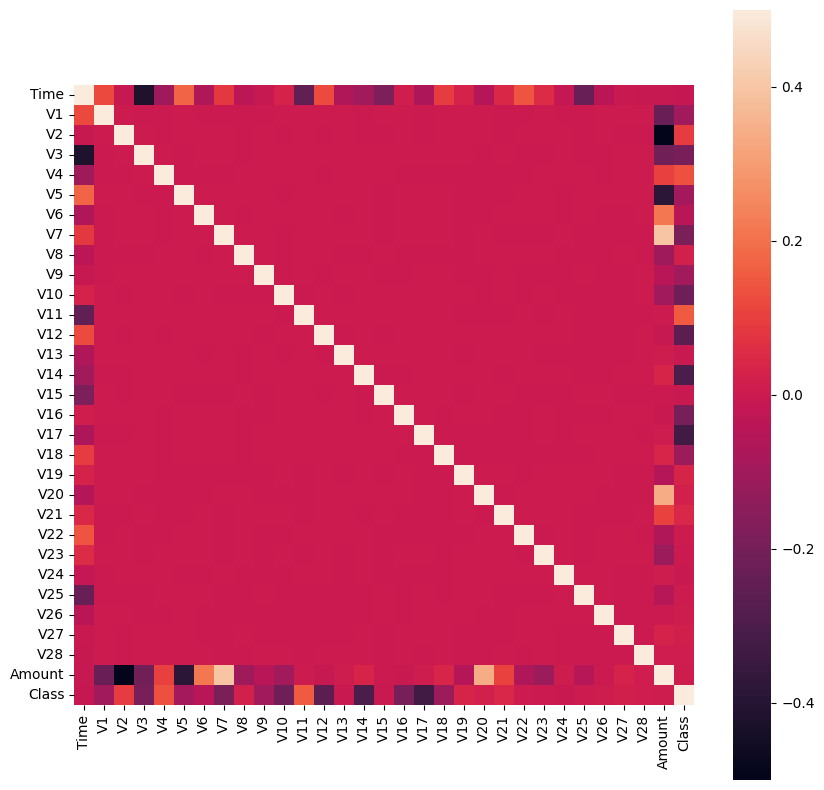

In [ ]:
corrMatrix = data.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, square = True, vmax = .5, vmin = -.5)
plt.show()

In [ ]:
y = data["Class"]
x = data.drop(["Class"], axis = 1)
print(x.shape, y.shape)
Ydata = y.values
Xdata = x.values

(284807, 30) (284807,)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xdata, Ydata, random_state = 42,test_size = 0.15)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(xtrain, ytrain)
ypred = RFC.predict(xtest)

In [ ]:
# calculating every score of the model
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score, f1_score, matthews_corrcoef, confusion_matrix
n_outliers = len(fraud_)
n_errors = (ypred != ytest).sum()
print("Random Forest Classifier")

# calculating accuray of the model
accuracy = accuracy_score(ytest, ypred)
print("Accuracy : ",accuracy)

# calculating precision of the model
precision = precision_score(ytest, ypred)
print("Precision: ",precision)

# calculating recall score of the model
recall = recall_score(ytest, ypred)
print("Recall: ",recall)

# calculating f1-score of the model
f1 = f1_score(ytest, ypred)
print("F1-Score: ",f1)

# calculating matthews correlation coefficient of the model
MCC = matthews_corrcoef(ytest, ypred)
print("Matthews correlation coefficient: ",MCC)

Random Forest Classifier
Accuracy :  0.9995552642666542
Precision:  0.9661016949152542
Recall:  0.7702702702702703
F1-Score:  0.8571428571428571
Matthews correlation coefficient:  0.8624425752254673


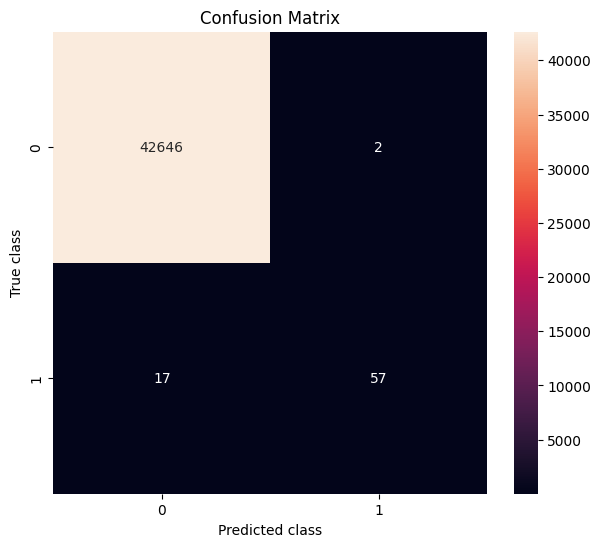

In [ ]:
# printing the confusion matrix
conf_matrix = confusion_matrix(ytest, ypred)
plt.figure(figsize = (7, 6))
sns.heatmap(conf_matrix, annot=True, fmt ="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
